<a href="https://colab.research.google.com/github/abdipourasl/Alzheimer/blob/main/MNE_Preprocessing_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-success">
<h1>EEG Preprocessing with MNE</h1>
</div>

In [ ]:
! pip install mne

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline
import os
import os.path as op
import mne
import numpy as np
import pandas as pd

### 1. Importing Raw  Data

>You need to provide your own EEG data with BrainVision format which have three files named  .vhdr, .vmrk and .eeg

<div class="alert alert-block alert-info">
<b>Tip:</b> You can change read_raw_brainvision() <a href="https://mne.tools/stable/auto_tutorials/io/plot_20_reading_eeg_data.html" title="Data EEG formats"> module based on your data format</a>
</div>

In [ ]:
import zipfile

# Replace 'your_zip_file.zip' with the path to your zip file
zip_path = '/content/drive/MyDrive/Alzheimer 2/Database_AD_MCI_HC_Wake_EDFraw_complete-20240930T174905Z-002.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')  # Specify your destination folder

In [ ]:
examples_dir = '/content/Database_AD_MCI_HC_Wake_EDFraw_complete/DatabaseCorretto/IDpz_109'  # Path to the raw EEG Data folder
edf_file = op.join(examples_dir, 'IDpz109_W1OA.edf')  # Path to the raw EEG EDF file

# Load the EDF file instead of BrainVision file
raw = mne.io.read_raw_edf(edf_file, preload=True)  # preload=True loads the data into memory


Extracting EDF parameters from /content/Database_AD_MCI_HC_Wake_EDFraw_complete/DatabaseCorretto/IDpz_109/IDpz109_W1OA.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 98303  =      0.000 ...   383.996 secs...


<ipython-input-94-459a80236b73>:5: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file, preload=True)  # preload=True loads the data into memory
<ipython-input-94-459a80236b73>:5: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file, preload=True)  # preload=True loads the data into memory
<ipython-input-94-459a80236b73>:5: RuntimeWarning: Highpass cutoff frequency 40.0 is greater than lowpass cutoff frequency 1.0, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_file, preload=True)  # preload=True loads the data into memory


In [ ]:
# Check channel names to confirm correct labeling
print(raw.info['ch_names'])


['Fp1-A1+A2', 'Fp2-A1+A2', 'F3-A1+A2', 'F4-A1+A2', 'Fz-A1+A2', 'F7-A1+A2', 'F8-A1+A2', 'C3-A1+A2', 'C4-A1+A2', 'Cz-A1+A2', 'P3-A1+A2', 'P4-A1+A2', 'Pz-A1+A2', 'T3-A1+A2', 'T4-A1+A2', 'T5-A1+A2', 'T6-A1+A2', 'O1-A1+A2', 'O2-A1+A2', 'A1-A1+A2', 'A2-A1+A2', 'EMG1+', 'EOG1+', 'ECG1+', 'SpO2+']


In [ ]:
# Setting multiple channel types at once
raw.set_channel_types({'EOG1+': 'eog', 'ECG1+': 'ecg', 'SpO2+': 'bio'})

<RawEDF | IDpz109_W1OA.edf, 25 x 98304 (384.0 s), ~18.8 MB, data loaded>

###### Consider just first 19 channels in preprocessing

In [ ]:
# Step 1: Remove unwanted channels
# Specify the channels to drop (SpO2+, EOG1+, EMG1+)
channels_to_drop = ['SpO2+', 'EOG1+', 'EMG1+', 'ECG1+']
raw.drop_channels(channels_to_drop)

# Step 2: Re-reference using the first 19 EEG channels (exclude ECG)
# First, get the names of the first 19 channels (all channels except ECG and reference ones)
ref_channels = [
    'Fp1-A1+A2', 'Fp2-A1+A2', 'F3-A1+A2', 'F4-A1+A2', 'Fz-A1+A2', 'F7-A1+A2',
    'F8-A1+A2', 'C3-A1+A2', 'C4-A1+A2', 'Cz-A1+A2', 'P3-A1+A2', 'P4-A1+A2',
    'Pz-A1+A2', 'T3-A1+A2', 'T4-A1+A2', 'T5-A1+A2', 'T6-A1+A2', 'O1-A1+A2', 'O2-A1+A2'
]

### 2. Downsampling

In [ ]:
raw.resample(256, npad="auto")    # set sampling frequency to 256 points per second

Sampling frequency of the instance is already 256.0, returning unmodified.


<RawEDF | IDpz109_W1OA.edf, 21 x 98304 (384.0 s), ~15.8 MB, data loaded>

>according to the Nyquist frequency, sampling rate should be at least two times of frequency.
Moreover, 128 points are suitable and 256 points are desirable


### 3. Filtering the data

In [ ]:
raw.filter(0.5, 45, fir_design='firwin', picks=['eeg'])  # band-pass filter from 0.5 to 45 frequency over just
                                                       # EEG channel and not EEG channel

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


<RawEDF | IDpz109_W1OA.edf, 21 x 98304 (384.0 s), ~15.8 MB, data loaded>

>Lw-pass filter with 1 Hz cutoff frequency for removing low-frequency drifts.
    High-pass filter with 30 Hz cutoff frequency for deteriorating the effect of
    the AC power line frequency, cell phones, the geomagnetic field and so forth.
    Therefore, a band-pass filter was used in the range 1Hz-30Hz with one step.
    You can apply another band pass filter due to your own assumtions and hypotheses.
    I recommend that band pass filtering would be better to occurr before the EEG
    data epoching and artifact removal with ICA.

### 4. Rereference

In [ ]:
# raw.set_eeg_reference('average', projection=True).apply_proj()  # re-referencing with the virtual average reference
# raw.set_eeg_reference(['A1-A1+A2', 'A2-A1+A2'], projection=True).apply_proj()
raw.set_eeg_reference(ref_channels=['A1-A1+A2', 'A2-A1+A2'])  # Specify the reference channels
raw.drop_channels(['A1-A1+A2', 'A2-A1+A2'])

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


<RawEDF | IDpz109_W1OA.edf, 19 x 98304 (384.0 s), ~14.3 MB, data loaded>

### 5. Visual Inspection

###### 5.1 Plot continuous data

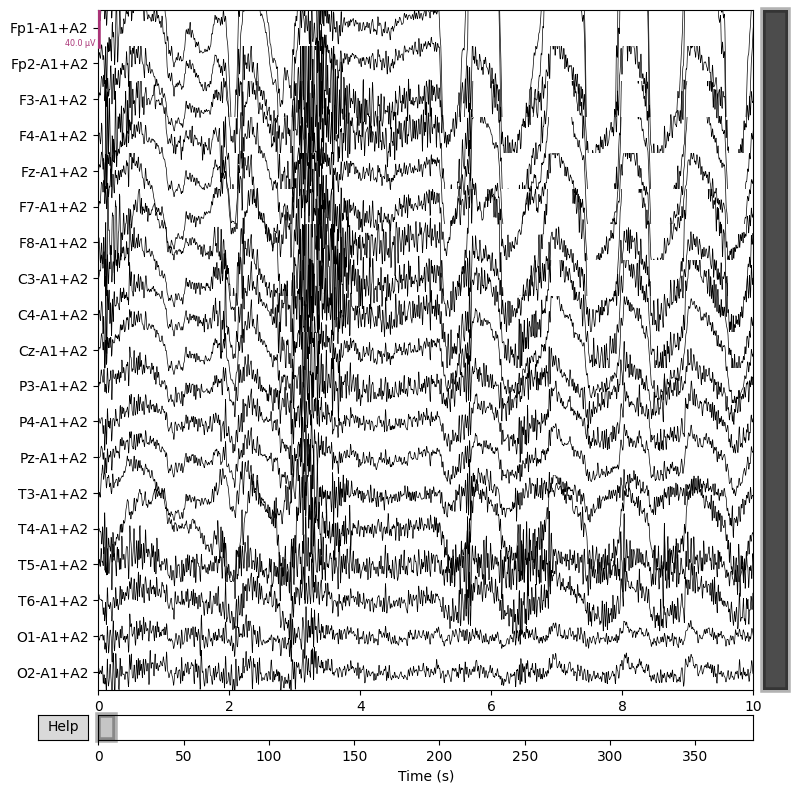

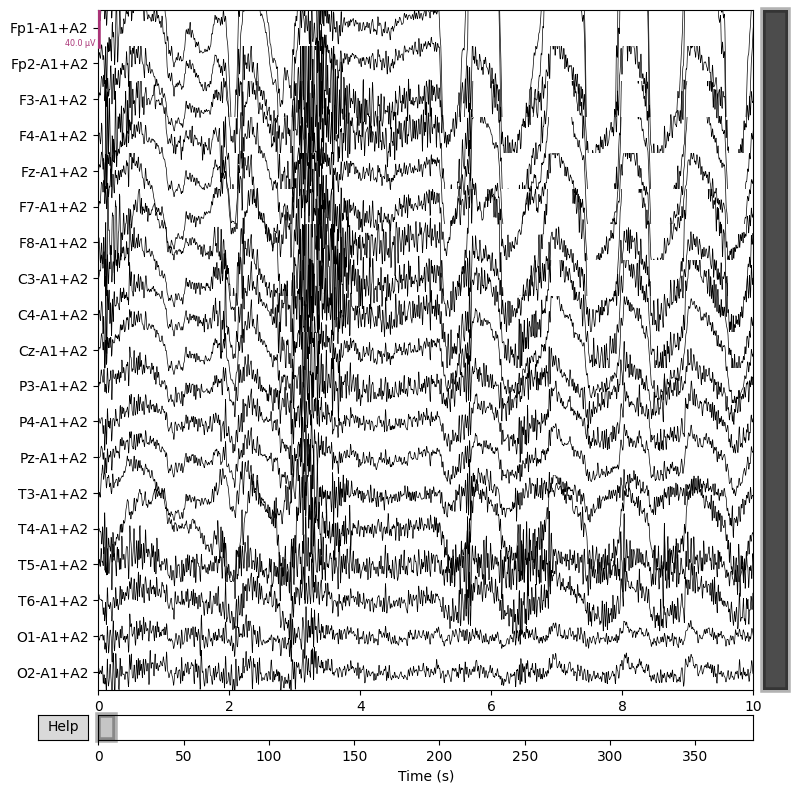

In [ ]:
raw.plot()

###### Mine 1: Peak-to-Peak Amplitude Rejection

Not setting metadata
192 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 192 events and 512 original time points ...
0 bad epochs dropped
    Rejecting  epoch based on EEG : ['Fp1-A1+A2', 'Fp2-A1+A2', 'F3-A1+A2', 'F4-A1+A2', 'F7-A1+A2', 'F8-A1+A2', 'C4-A1+A2', 'T4-A1+A2']
    Rejecting  epoch based on EEG : ['Fp1-A1+A2', 'Fp2-A1+A2', 'F3-A1+A2', 'F4-A1+A2', 'Fz-A1+A2', 'F7-A1+A2', 'F8-A1+A2', 'C3-A1+A2', 'C4-A1+A2', 'Cz-A1+A2', 'P3-A1+A2', 'P4-A1+A2', 'T3-A1+A2', 'T4-A1+A2', 'T5-A1+A2']
    Rejecting  epoch based on EEG : ['Fp1-A1+A2', 'Fp2-A1+A2', 'F3-A1+A2', 'F4-A1+A2', 'Fz-A1+A2', 'F8-A1+A2', 'C4-A1+A2', 'T4-A1+A2', 'T5-A1+A2']
    Rejecting  epoch based on EEG : ['Fp1-A1+A2', 'Fp2-A1+A2', 'F3-A1+A2', 'F4-A1+A2', 'Fz-A1+A2', 'F7-A1+A2', 'F8-A1+A2', 'C3-A1+A2', 'C4-A1+A2', 'Cz-A1+A2', 'T4-A1+A2']
    Rejecting  epoch based on EEG : ['Fp1-A1+A2', 'Fp2-A1+A2', 'F3-A1+A2', 'F4-A1+A2', 'Fz-A1+A2', 'F7-A1+A2', 'F8-A1+A2',

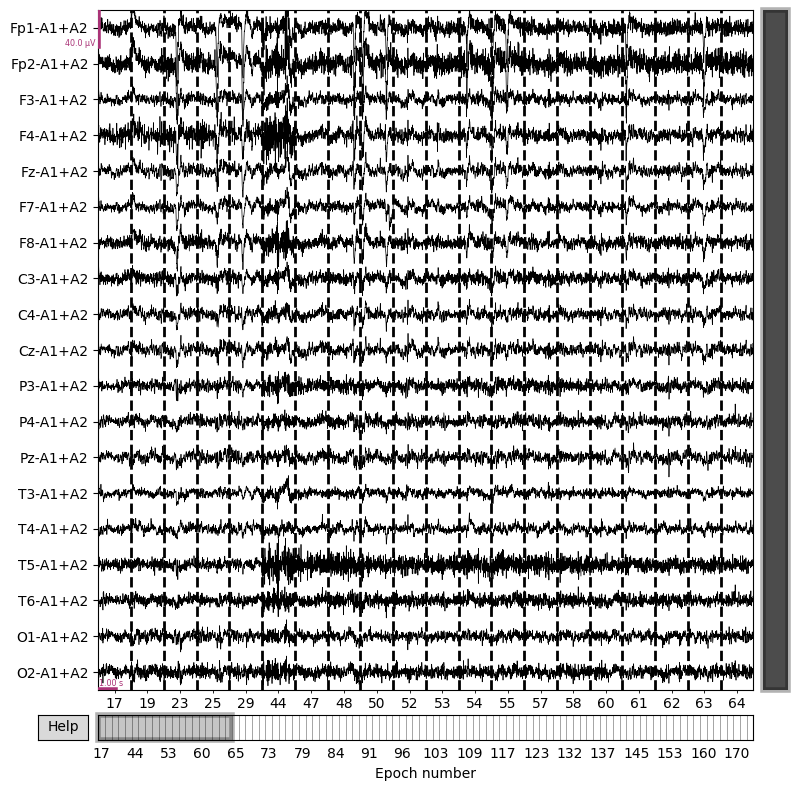

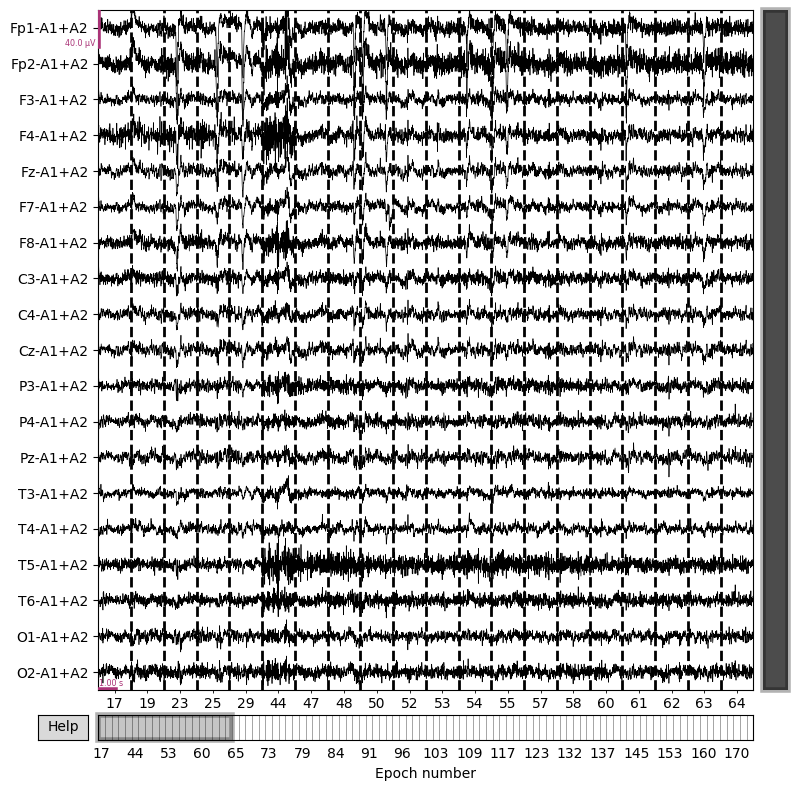

In [ ]:
# Create fixed-length epochs
epochs = mne.make_fixed_length_epochs(raw, duration=2.0, preload=True)

# Define rejection thresholds (values in microvolts)
reject_criteria = dict(eeg=100e-6)

# Drop bad epochs based on the rejection criteria
epochs.drop_bad(reject=reject_criteria)

epochs.plot()


###### Mine 2: Frequency-Based Rejection (Power Spectrum)

Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


<ipython-input-103-b994bf2d7482>:6: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  psds.plot()


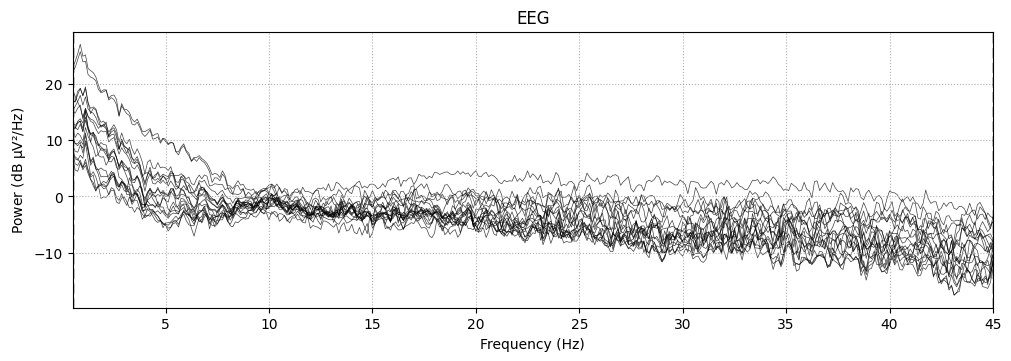

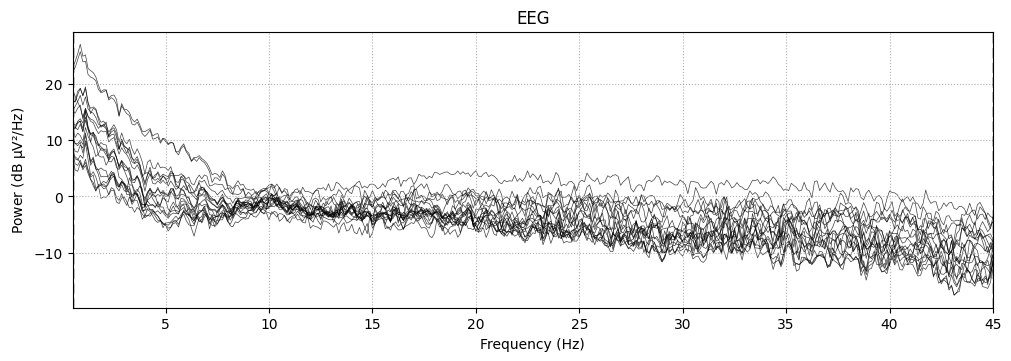

In [ ]:
# Compute the Power Spectral Density (PSD) directly from the raw object
psds = raw.compute_psd(fmin=0.5, fmax=45)
freqs = psds.freqs

# Optional: Plot the PSD
psds.plot()


###### mine 4: Signal Discontinuities and Abrupt Jumps

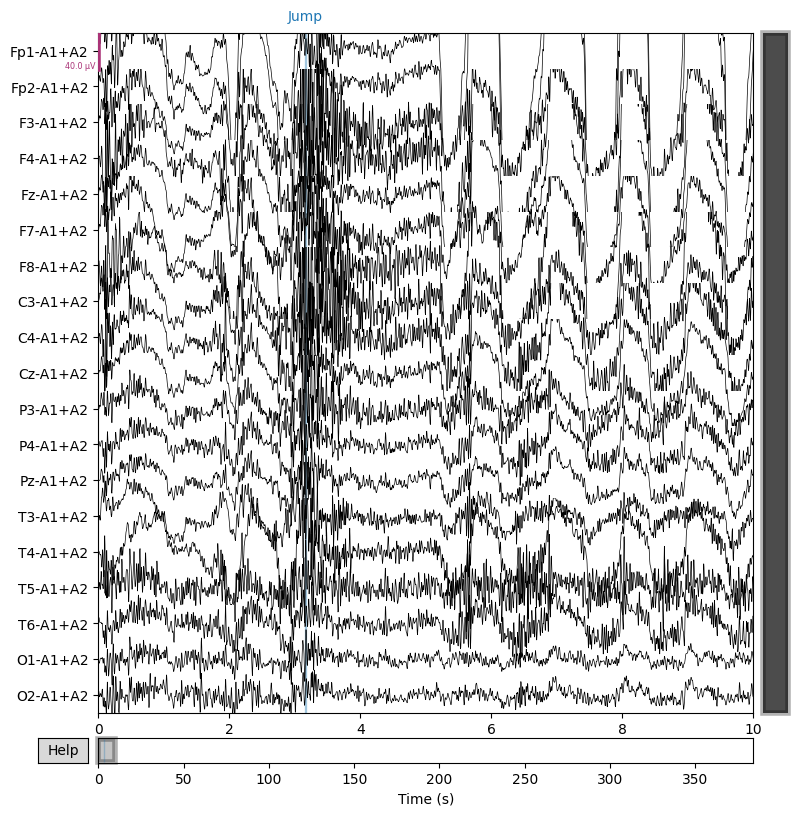

<Annotations | 1 segment: Jump (1)>


In [ ]:
import mne
import numpy as np

# raw = mne.io.read_raw_edf(edf_file, preload=True)

# Threshold for detecting abrupt jumps (customize as needed)
threshold = 100e-6

# Find discontinuities by calculating the difference between consecutive samples
signal_diff = np.abs(np.diff(raw.get_data()))

# Create a boolean mask for abrupt jumps exceeding the threshold
abrupt_jumps = np.any(signal_diff > threshold, axis=0)

# Get the indices of the abrupt changes
jump_indices = np.where(abrupt_jumps)[0]

# Create lists to store the onset and duration of annotations
onsets = []
durations = []

# Create annotations for these segments
for idx in jump_indices:
    start = max(0, idx - 1)  # Adjust for segment length (1 second in this example)
    end = min(raw.n_times, idx + 1)
    onsets.append(start / raw.info['sfreq'])  # onset in seconds
    durations.append((end - start) / raw.info['sfreq'])  # duration in seconds

# Convert to numpy arrays
onsets_array = np.array(onsets)
durations_array = np.array(durations)

# Create Annotations object using the correct constructor
annotations = mne.Annotations(onsets_array, durations_array, ['Jump'] * len(onsets_array))

# Add the annotations to the raw object
raw.set_annotations(annotations)

# Plot the raw data with annotations
raw.plot()

# Review the annotations
print(raw.annotations)


###### Mine: ICA

In [ ]:
# Apply ICA for artifact removal (e.g., eye blinks, muscle artifacts)
ica = mne.preprocessing.ICA(n_components=19, random_state=97, max_iter=800)
ica.fit(raw)

# Automatically detect EOG artifacts (e.g., eye blinks)
# eog_inds, eog_scores = ica.find_bads_eog(raw)
# ica.exclude = eog_inds  # Mark these components for exclusion

# Apply ICA to remove artifacts
raw_cleaned = ica.apply(raw)


Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 19 components
Fitting ICA took 6.0s.
Applying ICA to Raw instance
    Transforming to ICA space (19 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components


In [ ]:
import mne

# Define the duration of the epochs in seconds
epoch_duration = 2.0  # 2 seconds

# Create fixed-length epochs
epochs = mne.make_fixed_length_epochs(raw_cleaned, duration=epoch_duration, preload=True)

# Optional: Check the number of epochs created
print(f"Number of epochs created: {len(epochs)}")

# Save the epochs to disk
# epochs.save('/content/IDpz109_W1OA-epochs-2s.fif', overwrite=True)  # Adjust the file path as needed


Not setting metadata
192 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 192 events and 512 original time points ...
0 bad epochs dropped
Number of epochs created: 192


In [ ]:
# # Reload the original EDF file (for ECG channel)
# raw_ecg = mne.io.read_raw_edf(edf_file, preload=True)

# # Pick the ECG channel only
# raw_ecg.pick_channels(['ECG1+'])

# # Apply the same filtering and reference as the EEG data
# raw_ecg.filter(0.5, 45, fir_design='firwin')  # Apply same band-pass filter
# raw_ecg.set_eeg_reference('average', projection=True).apply_proj()  # Apply same referencing

# # Now append the ECG channel back to the cleaned raw data
# raw_cleaned.add_channels([raw_ecg])

# # Continue with your workflow


In [ ]:
import numpy as np
from scipy.io import savemat

# Convert epochs to a NumPy array
data_array = epochs.get_data()  # Shape: (n_epochs, n_channels, n_times)

# Prepare a dictionary to save as .mat
mat_dict = {
    'data': data_array,
    'times': epochs.times,
    'events': epochs.events,
    'event_ids': epochs.event_id
}

# Save the dictionary as a .mat file
savemat('/content/IDpz109_W1OA-cleaned.mat', mat_dict)
